# Customer Churm Predition Model

Devan K S

Entri Elevate

20-09-2024

# Problem Statement

Customer churn is a significant challenge for businesses, leading to loss of revenue and increased customer acquisition costs. Accurately predicting churn enables companies to retain valuable customers through targeted interventions and personalized offers. This project aims to develop a churn prediction model to identify customers likely to leave the bank.


# Objective

To develop a robust churn prediction model using machine learning techniques to predict whether a customer will churn or not.

# Data Description

- #### Source:[DataSet](https://data.world/sonalnew/credit-card-customers/workspace/file?filename=BankChurners.csv)

- #### Feature: Customer attributes such as age, gender, credit limit, transaction counts, and more*

# Data Colletion

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew,kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("Bank_data.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Data Set contains 10127 rows and 23 columns

# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

No Null values

In [8]:
df.shape

(10127, 23)

# Data Preprocessing 

In [9]:
#Droping columns which doesn't provide any analytical insights
columns_to_drop = ['CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df.drop(columns=columns_to_drop)

In [10]:
#checking shape after droping columns
df.shape

(10127, 20)

In [12]:
#statistic summary
df.describe(include="all")

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [13]:
df.nunique

<bound method DataFrame.nunique of           Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Si

**Outlires Handling**

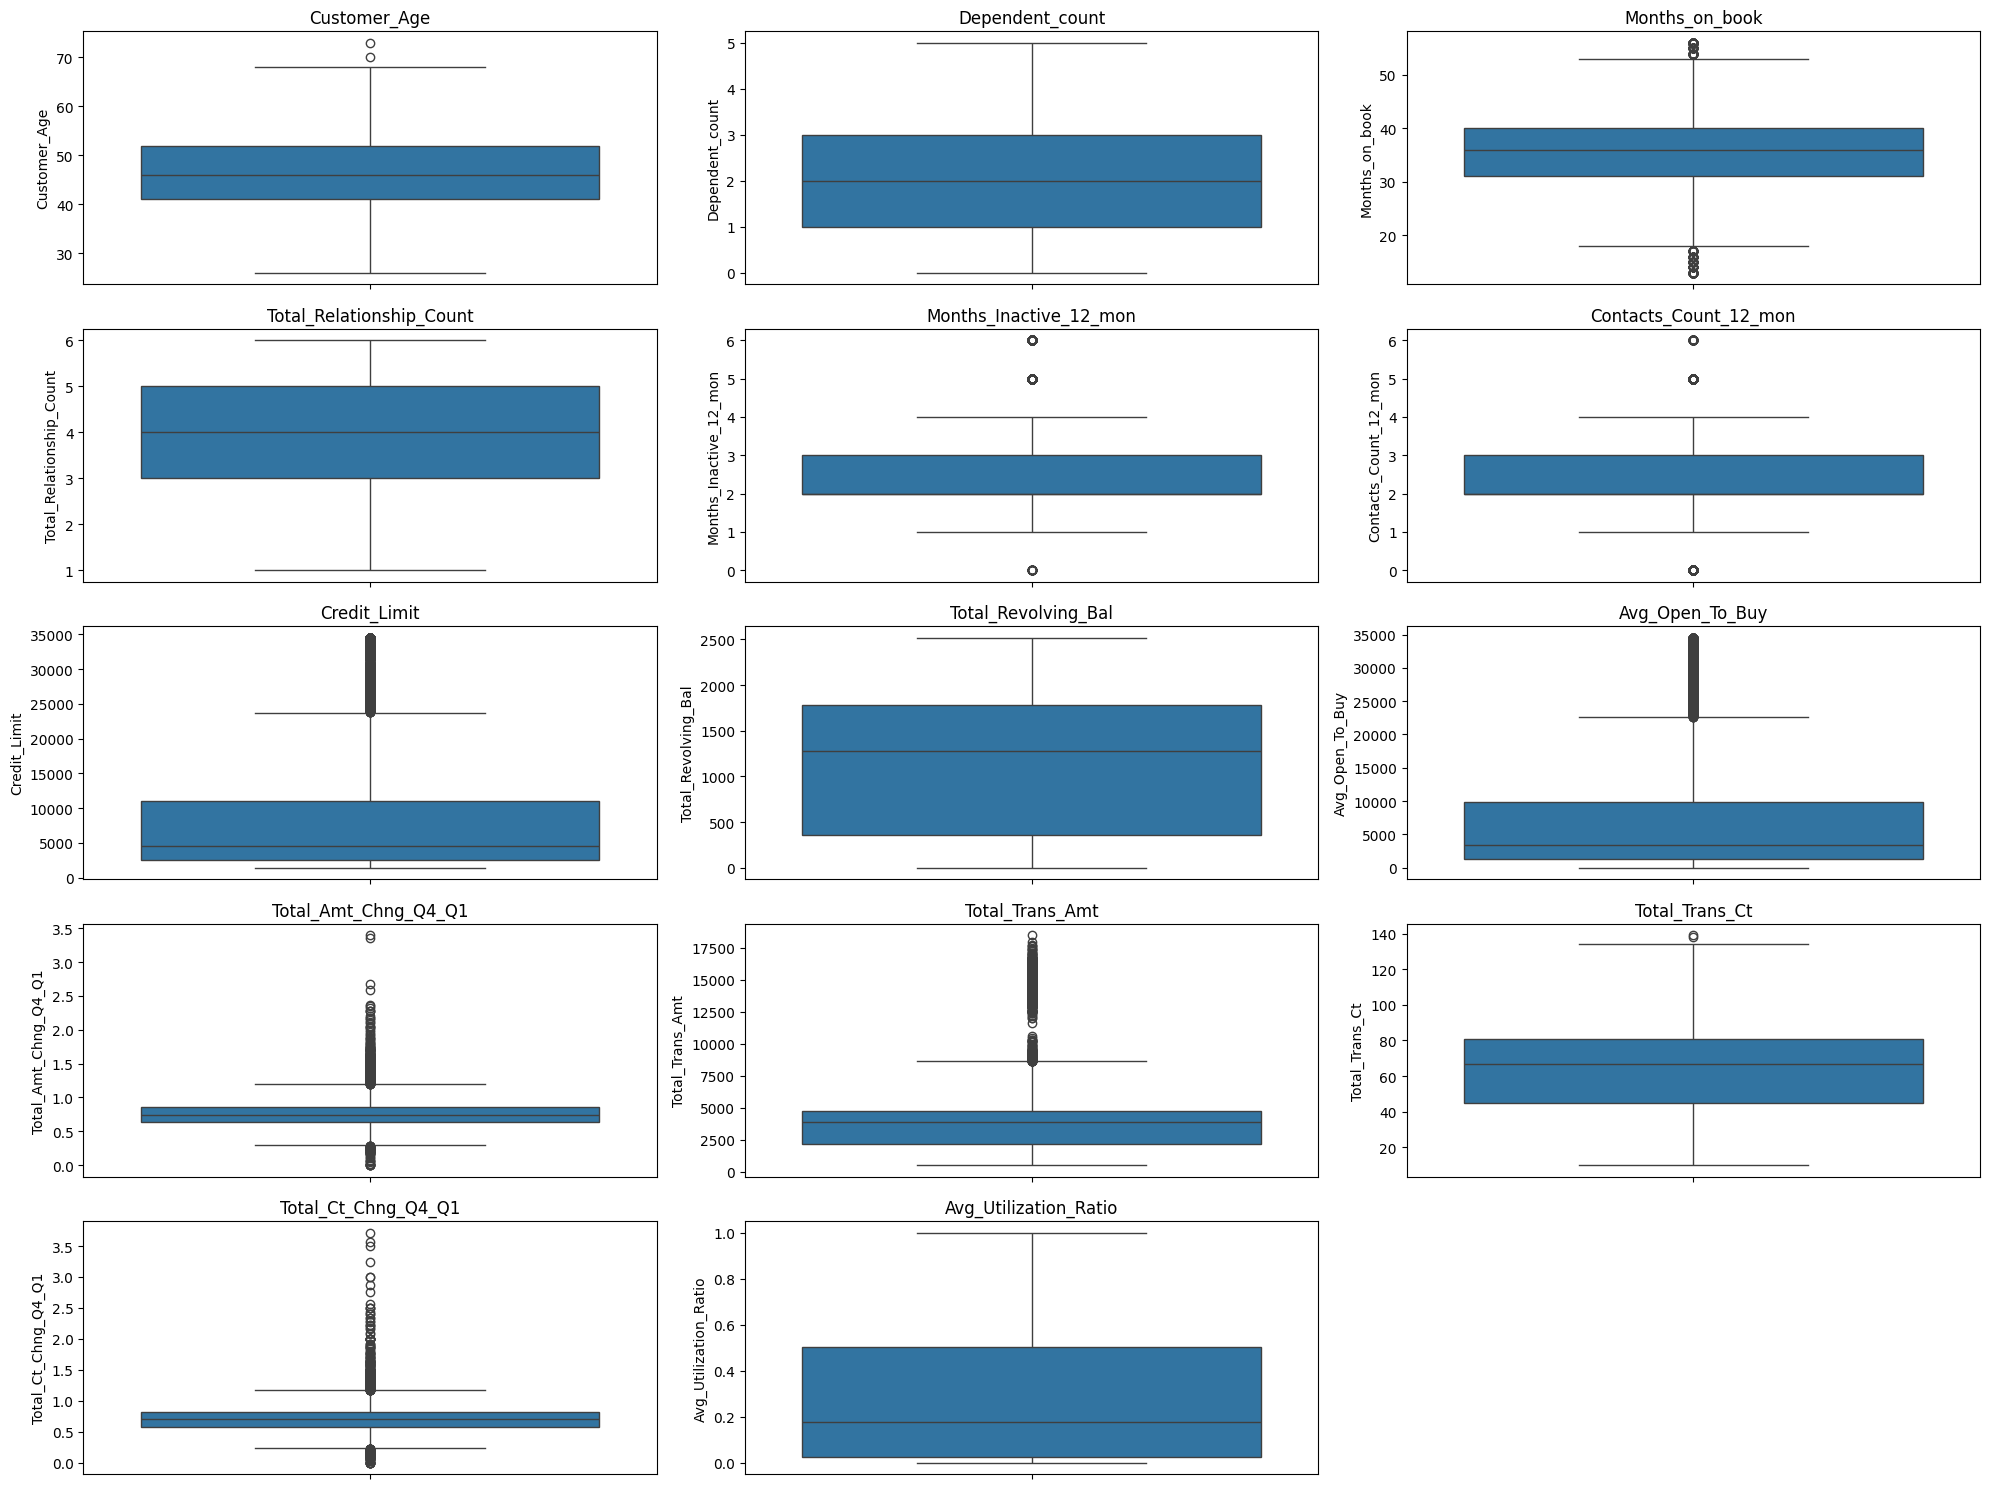

In [14]:
plt.figure(figsize=(20,15))
num_col=df.select_dtypes(include=["int64","float64"])

for i,col in enumerate(num_col):
    plt.subplot(5,3,i+1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

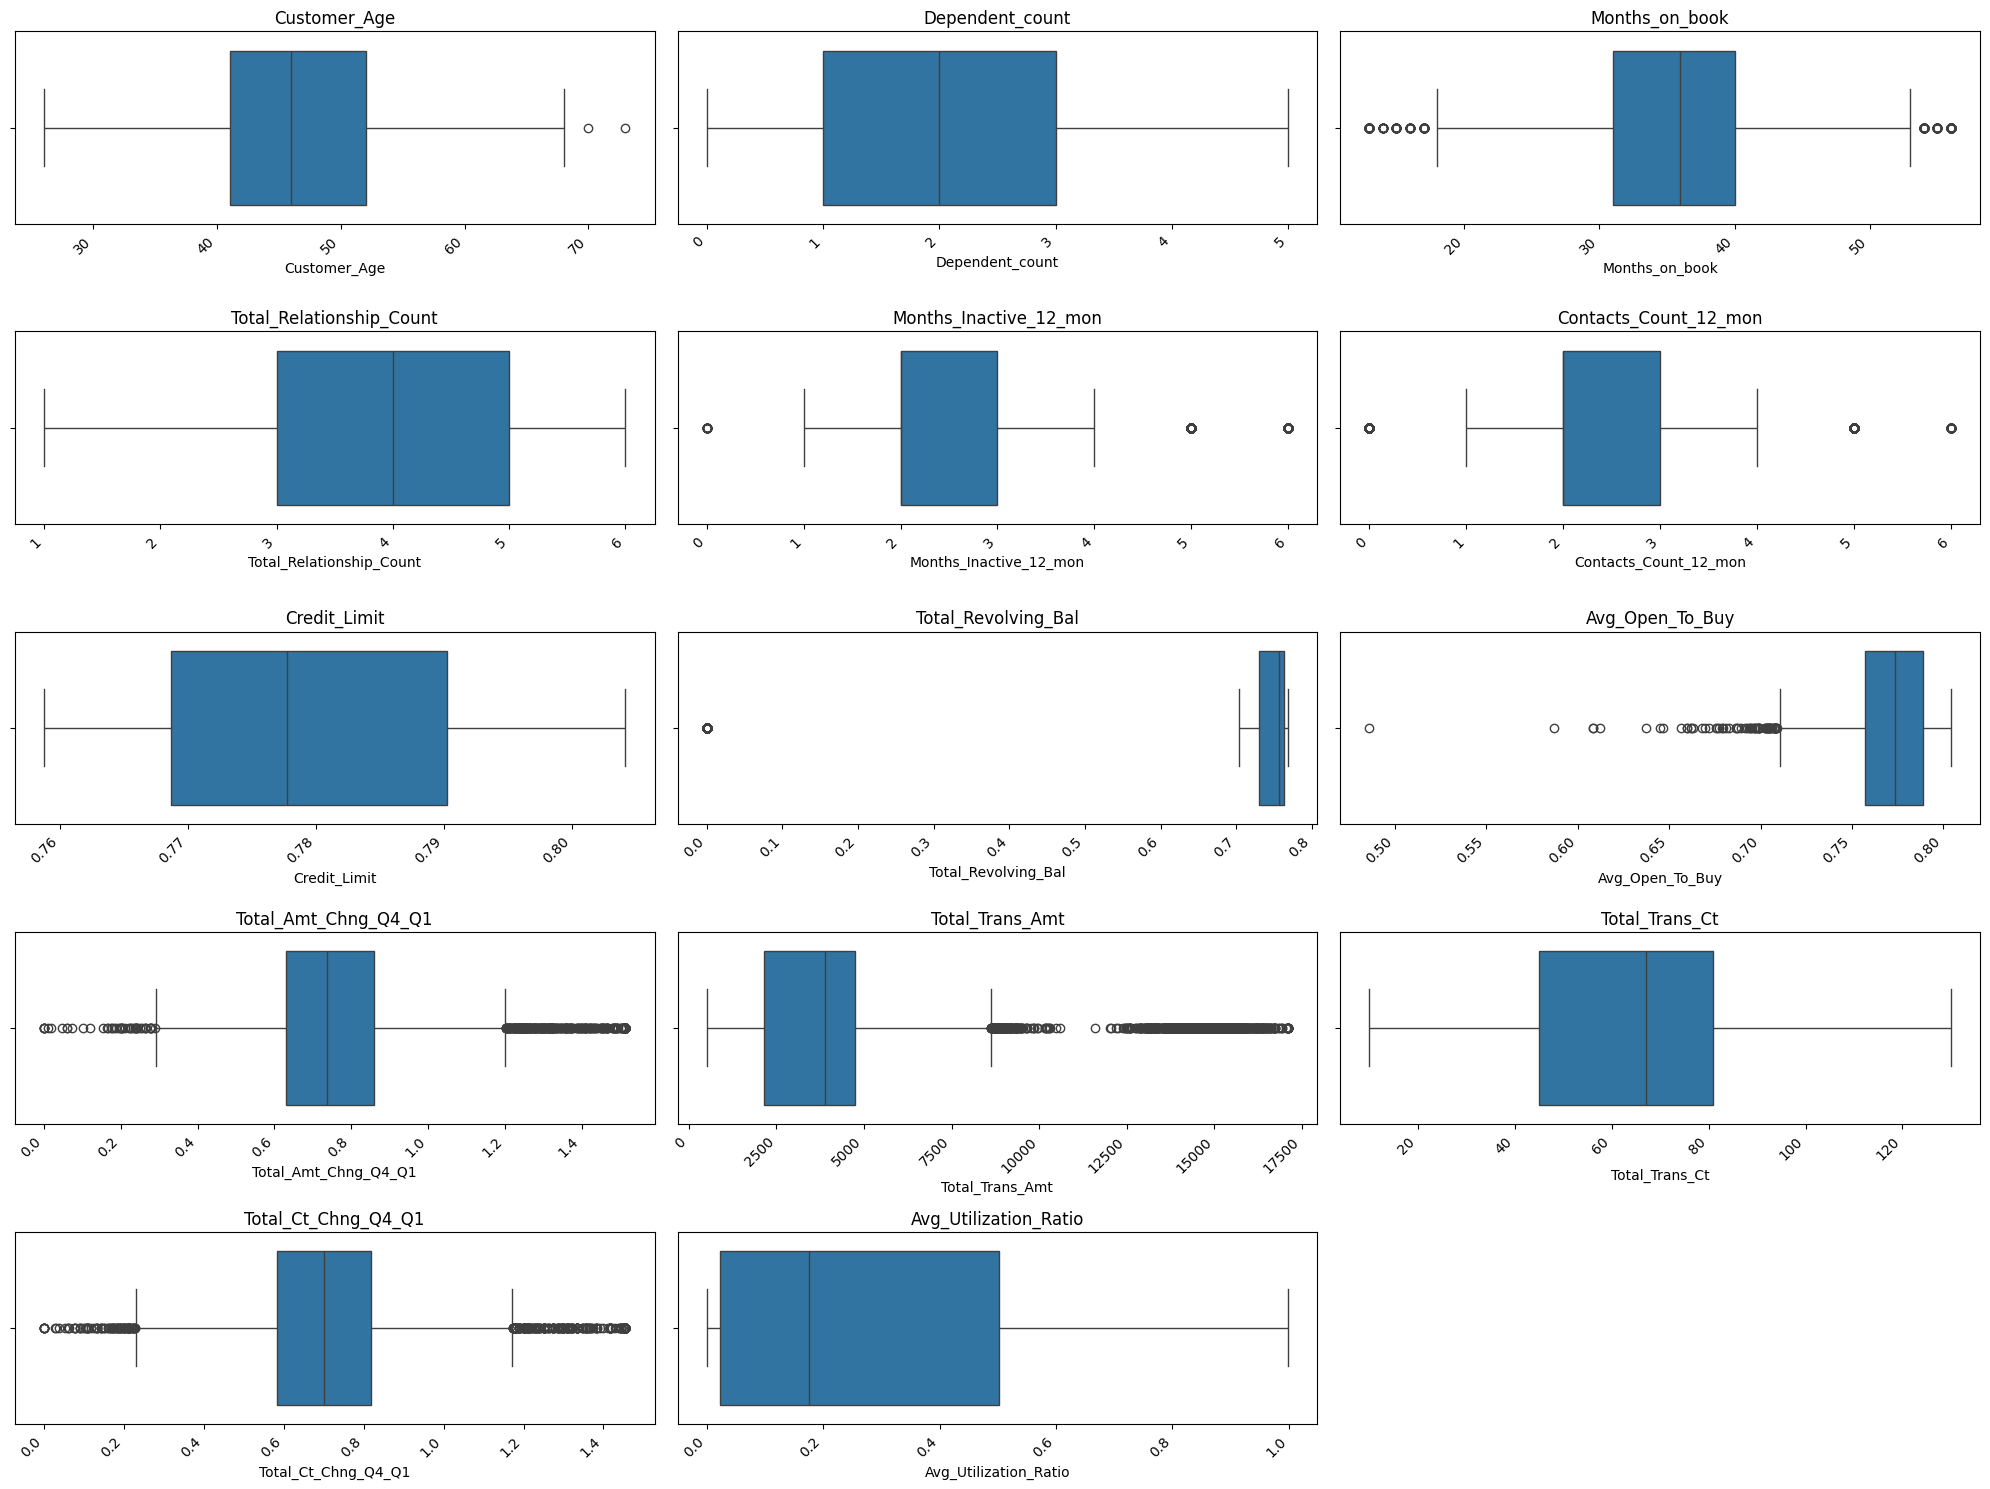

In [45]:
# Cliping age maximum 100 years
df['Customer_Age'] = df['Customer_Age'].clip(upper=100)

# Log transformation
for column in ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy']:
    df[column] = np.log1p(df[column])

# Cliping at 99th percentile
for column in ['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']:
    df[column] = df[column].clip(upper=df[column].quantile(0.99))

#  Cliping at 99.9th percentile
for column in ['Total_Trans_Amt', 'Total_Trans_Ct']:
    df[column] = df[column].clip(upper=df[column].quantile(0.999))

#  Cliping between 0 and 1
df['Avg_Utilization_Ratio'] = df['Avg_Utilization_Ratio'].clip(0, 1)
                                                               
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(20, 15))  # Fixed figure size
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.tight_layout()
plt.show()


we  only handle the some outliers becuase removing the data may led to have an effect on our model

# visualization

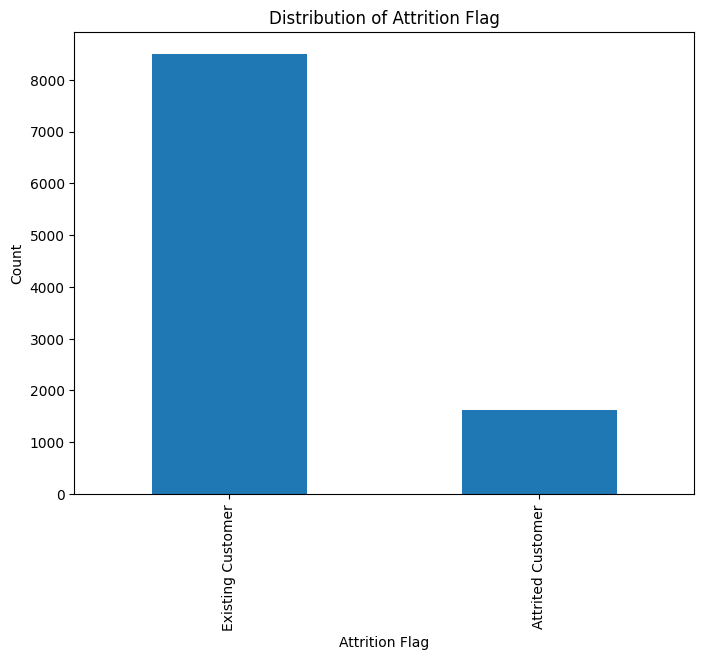

In [18]:
#Bar plot
plt.figure(figsize=(8, 6))
df['Attrition_Flag'].value_counts().plot(kind='bar')
plt.title('Distribution of Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

we can see the proportion of customers who have left (attrited) versus those who stayed


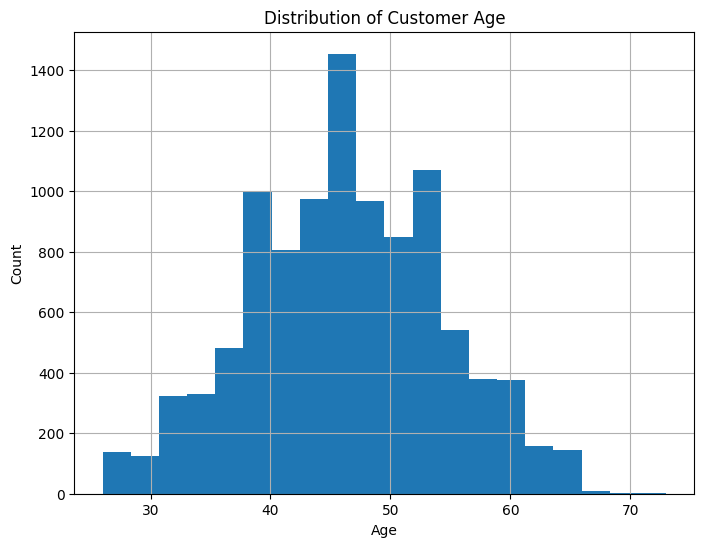

In [19]:
#Histogram of Customer Age
plt.figure(figsize=(8, 6))
df['Customer_Age'].hist(bins=20)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The histogram  shows  age group between 40 and 50 are more common among the bank's customers

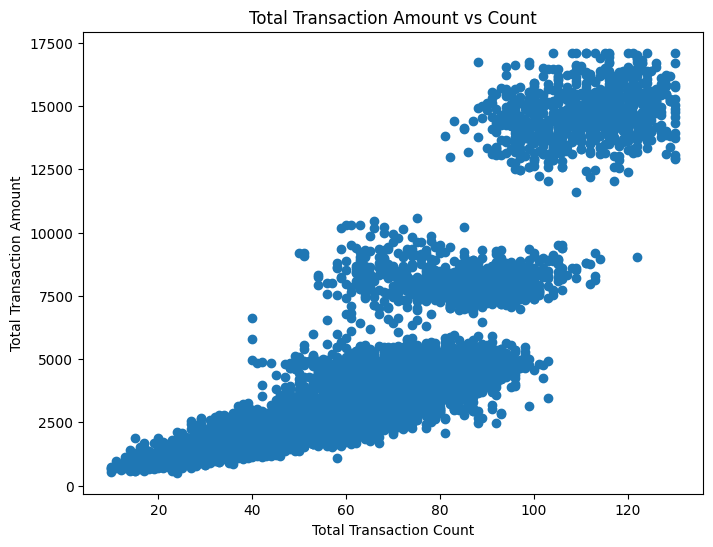

In [24]:
#Scatter plot of Total Transaction Amount vs Total Transaction Count
plt.figure(figsize=(8, 6))
plt.scatter(df['Total_Trans_Ct'], df['Total_Trans_Amt'])
plt.title('Total Transaction Amount vs Count')
plt.xlabel('Total Transaction Count')
plt.ylabel('Total Transaction Amount')
plt.show()

The scatter plot will show if customers who make more transactions also tend to spend more money overall.

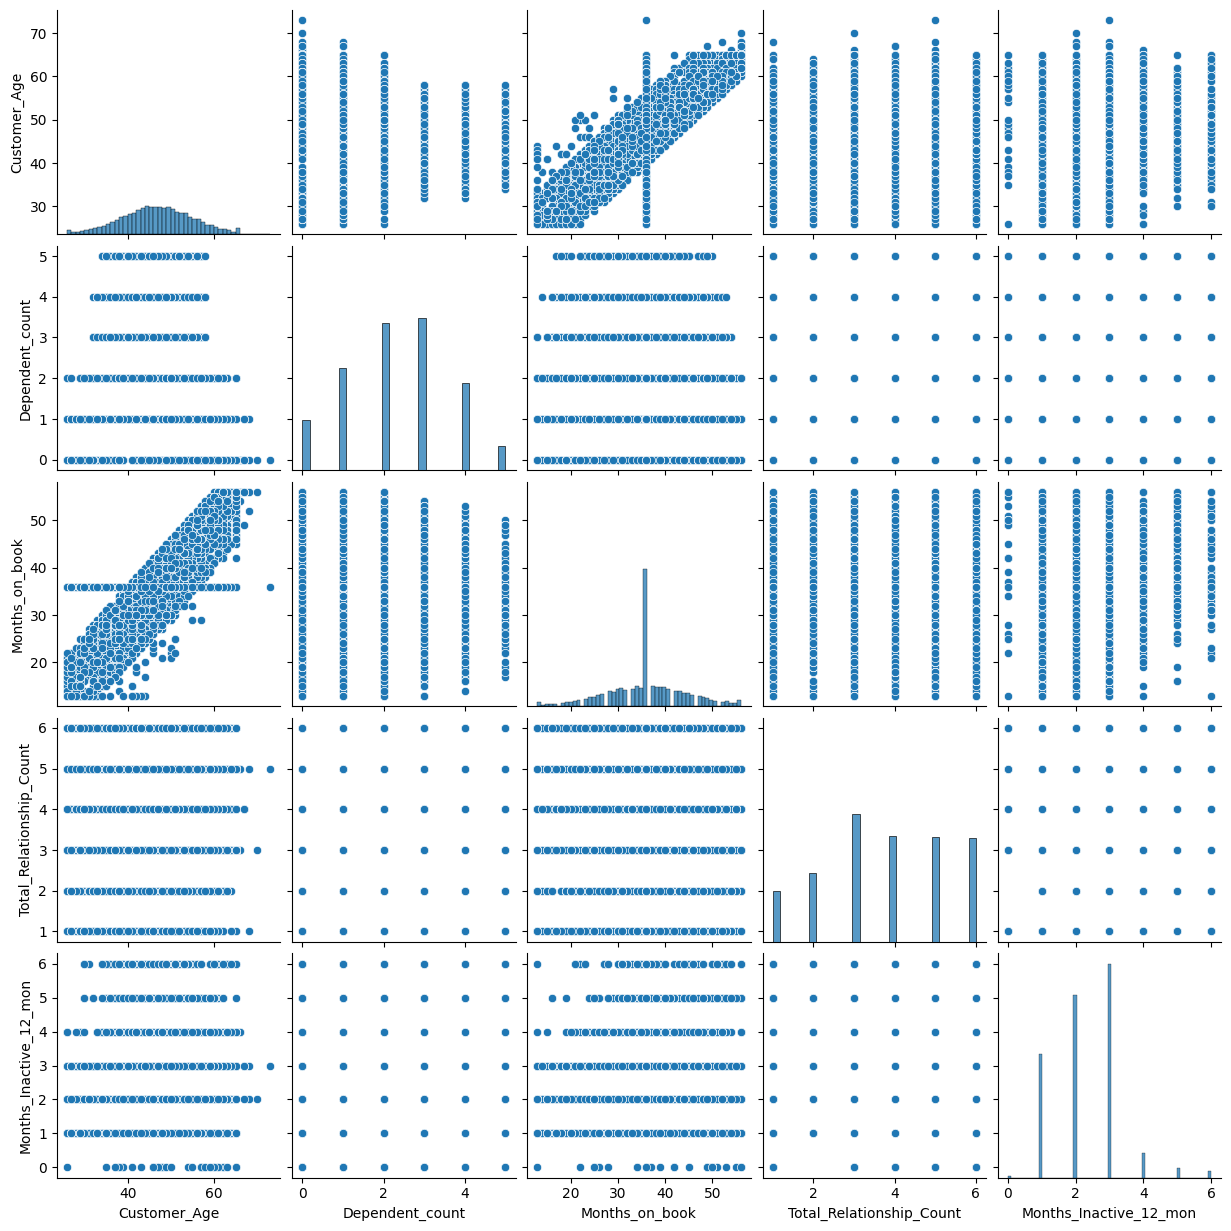

In [23]:
#Pair Plot
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[numeric_cols[:5]])  # Plot first 5 numeric columns
plt.show()

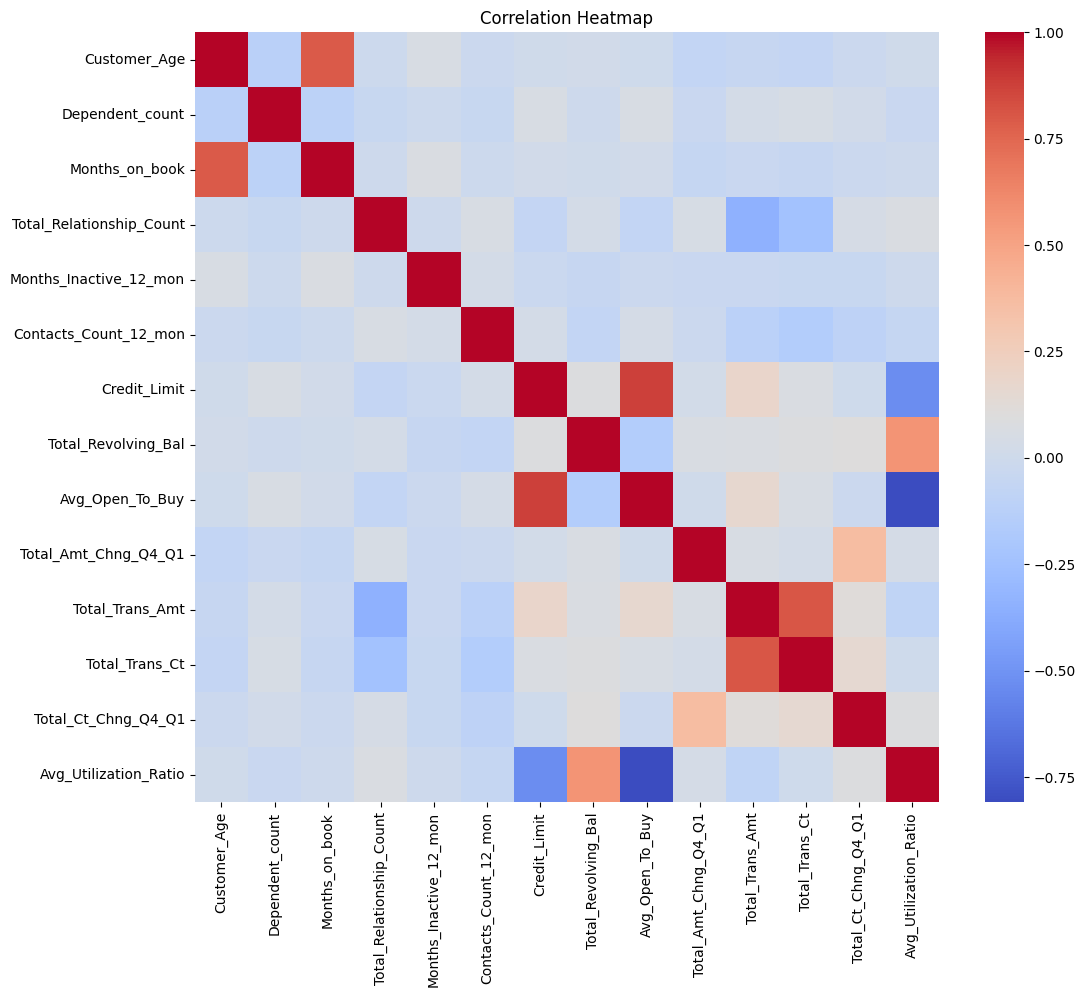

In [25]:
#Correlation heatmap of numerical variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

we can  find a strong correlation between credit limit and total transaction amount.


# Feature Engineering

In [26]:
#identifying categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical columns:\n{categorical_columns}")

Categorical columns:
Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')


In [27]:
#One-hot encoding
columns_to_onehot = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category'] 
df_encoded = pd.get_dummies(df, columns=columns_to_onehot, drop_first=True)
#label encoding
label_encoder = LabelEncoder()
df_encoded['Card_Category_Encoded'] = label_encoder.fit_transform(df['Card_Category'])
df_encoded = df_encoded.drop('Card_Category', axis=1)

In [28]:
df_encoded.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Encoded
0,45,3,39,5,1,3,1.207909,1.110404,1.206095,1.335000,...,False,True,False,False,False,True,False,False,False,0
1,49,5,44,6,1,2,1.195275,1.114923,1.191912,1.514405,...,False,False,True,False,False,False,False,True,False,0
2,51,3,36,4,1,0,1.167001,0.000000,1.167001,1.514405,...,False,True,False,False,False,False,True,False,False,0
3,40,4,34,3,4,1,1.165936,1.156344,1.111440,1.405000,...,False,False,False,True,False,False,False,True,False,0
4,40,3,21,5,1,0,1.177719,0.000000,1.177719,1.514405,...,False,True,False,False,False,True,False,False,False,0


In [29]:
df_encoded.shape

(10127, 31)

In [30]:
#info about encoded data set
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_Age                      10127 non-null  int64  
 1   Dependent_count                   10127 non-null  int64  
 2   Months_on_book                    10127 non-null  int64  
 3   Total_Relationship_Count          10127 non-null  int64  
 4   Months_Inactive_12_mon            10127 non-null  int64  
 5   Contacts_Count_12_mon             10127 non-null  int64  
 6   Credit_Limit                      10127 non-null  float64
 7   Total_Revolving_Bal               10127 non-null  float64
 8   Avg_Open_To_Buy                   10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 10  Total_Trans_Amt                   10127 non-null  float64
 11  Total_Trans_Ct                    10127 non-null  int64  
 12  Tota

# Feature Selection

In [31]:
#importing libraries for feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

**Feature Importance using Random Forest**

In [32]:
X = df_encoded.drop('Attrition_Flag_Existing Customer', axis=1)
y = df_encoded['Attrition_Flag_Existing Customer']        # seperating features and target variable

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_imp = pd.DataFrame({"Features": X.columns, "Importance": importances})
feature_imp = feature_imp.sort_values("Importance", ascending=False)

print("Top 10 features by importance:")
print(feature_imp.head(10))

Top 10 features by importance:
                    Features  Importance
10           Total_Trans_Amt    0.176620
11            Total_Trans_Ct    0.167173
12       Total_Ct_Chng_Q4_Q1    0.107170
7        Total_Revolving_Bal    0.098848
13     Avg_Utilization_Ratio    0.072622
9       Total_Amt_Chng_Q4_Q1    0.058986
3   Total_Relationship_Count    0.057912
6               Credit_Limit    0.035952
8            Avg_Open_To_Buy    0.034227
0               Customer_Age    0.031917


**Feature Importance using SelectKBest**

In [33]:
selector = SelectKBest(score_func=f_classif , k=10) 
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Top 10  Features : \n {selected_features}")

Top 10  Features : 
 ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [34]:
#Combining both methods
common_features=set(feature_imp.head(10)["Features"]) & set(selected_features)
print(f"Common Features \n {common_features}")

Common Features 
 {'Total_Trans_Amt', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Relationship_Count', 'Total_Trans_Ct', 'Total_Revolving_Bal'}


In [35]:
#Creating new dataframe with features we selected
selected_columns = list(common_features) + ['Attrition_Flag_Existing Customer']
df_selected = df_encoded[selected_columns]

In [36]:
df_selected.shape

(10127, 9)

In [37]:
df_selected

,Total_Trans_Amt,Credit_Limit,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Trans_Ct,Total_Revolving_Bal,Attrition_Flag_Existing Customer
0,1144.0,1.207909,0.061,1.335000,1.455,5,42,1.110404,True
1,1291.0,1.195275,0.105,1.514405,1.455,6,33,1.114923,True
2,1887.0,1.167001,0.000,1.514405,1.455,4,20,0.000000,True
3,1171.0,1.165936,0.760,1.405000,1.455,3,20,1.156344,True
4,816.0,1.177719,0.000,1.514405,1.455,5,28,0.000000,True
...,...,...,...,...,...,...,...,...,...
10122,15476.0,1.172322,0.462,0.703000,0.857,3,117,1.145142,True
10123,8764.0,1.174517,0.511,0.804000,0.683,4,69,1.151270,False
10124,10291.0,1.182140,0.000,0.819000,0.818,5,60,0.000000,False
10125,8395.0,1.181374,0.000,0.535000,0.722,4,62,0.000000,False


# Data Splitting

In [38]:
X = df_selected.drop('Attrition_Flag_Existing Customer', axis=1)
y = df_selected['Attrition_Flag_Existing Customer']
#splitting data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [39]:
#Standardisation
X = df_selected.drop('Attrition_Flag_Existing Customer', axis=1)
y = df_selected['Attrition_Flag_Existing Customer']

numeric_columns = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

#combining
df_scaled = pd.concat([X, y], axis=1)

In [40]:
df_final=df_scaled
df_final

,Total_Trans_Amt,Credit_Limit,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Trans_Ct,Total_Revolving_Bal,Attrition_Flag_Existing Customer
0,-0.960124,0.935158,-0.775882,2.826174,3.501500,0.763943,-0.974118,0.518047,True
1,-0.916824,0.503525,-0.616276,3.703548,3.501500,1.407306,-1.357699,0.527317,True
2,-0.741269,-0.462396,-0.997155,3.703548,3.501500,0.120579,-1.911760,-1.759873,True
3,-0.952171,-0.498783,1.759686,3.168506,3.501500,-0.522785,-1.911760,0.612290,True
4,-1.056739,-0.096230,-0.997155,3.703548,3.501500,0.763943,-1.570800,-1.759873,True
...,...,...,...,...,...,...,...,...,...
10122,3.261457,-0.280614,0.678714,-0.264595,0.699466,-0.522785,2.222390,0.589310,True
10123,1.284395,-0.205632,0.856458,0.229341,-0.115842,0.120579,0.176625,0.601880,False
10124,1.734183,0.054816,-0.997155,0.302698,0.516725,0.763943,-0.206956,-1.759873,False
10125,1.175704,0.028635,-0.997155,-1.086192,0.066900,0.120579,-0.121716,-1.759873,False


# Model Building

In [41]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Classifier': MLPClassifier(),
    'Naive Bayes': GaussianNB()
}


# Model Evaluation

In [42]:
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression:
Accuracy: 0.8850
Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.45      0.56       327
        True       0.90      0.97      0.93      1699

    accuracy                           0.88      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.87      0.88      0.87      2026


SVM:
Accuracy: 0.8386
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       327
        True       0.84      1.00      0.91      1699

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.76      2026


Decision Tree:
Accuracy: 0.9368
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.82      0.81       327
        True       0.97      0.96      0.96      1699

    accuracy      

Decision Tree have the highest accuracy among these model.MLP Classifier have the least accuracy

# Hyperparameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'SVM': {'C': [1, 10]},
    'Decision Tree': {'max_depth': [5, 10]},
    'MLP Classifier': {'hidden_layer_sizes': [(50,), (100,)]},
}

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Classifier': MLPClassifier(max_iter=1000),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=3, n_jobs=-1)
        grid_search.fit(X_train, y_train.values.ravel())
        print(f"\n{name} Best Parameters: {grid_search.best_params_}")
        print(f"Best CV Score: {grid_search.best_score_:.4f}")
        models[name] = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train.values.ravel())
        
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Test Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression Best Parameters: {'C': 0.1}
Best CV Score: 0.8943

SVM Best Parameters: {'C': 1}
Best CV Score: 0.8395

Decision Tree Best Parameters: {'max_depth': 10}
Best CV Score: 0.9331

MLP Classifier Best Parameters: {'hidden_layer_sizes': (50,)}
Best CV Score: 0.8400

Logistic Regression Test Accuracy: 0.9033
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.51      0.63       327
        True       0.91      0.98      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.87      0.74      0.79      2026
weighted avg       0.90      0.90      0.89      2026


SVM Test Accuracy: 0.8386
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       327
        True       0.84      1.00      0.91      1699

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weig

After hyperparameter tuning acuuracy of Logistic Regression have significally incresed.Accuracy of SVM,Decision Tree,Naive Bayes hardly changed.

# Save the Model

In [47]:
import joblib
joblib.dump(models,'model_joblib')

['model_joblib']

# Conclusion

<Figure size 1000x600 with 0 Axes>

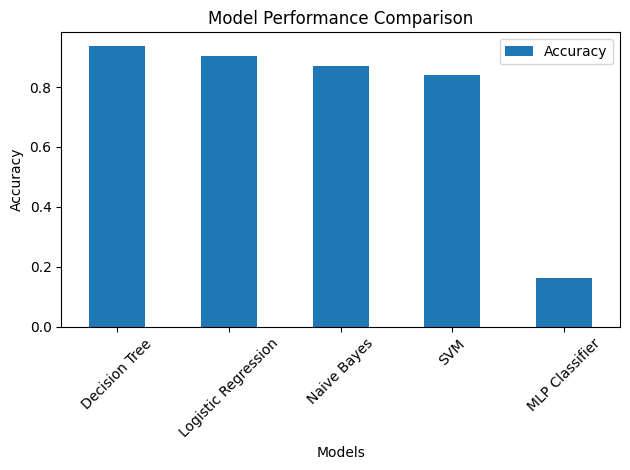

In [66]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
results_df.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The evaluation of various classification models for predicting bank churners revealed that the Decision Tree model achieved the highest test accuracy of 0.9339, demonstrating its effectiveness in this task.MLP classifier model achieved least test accuracy of 0.1614. Logistic Regression also showed significant improvement after hyperparameter tuning, achieving an accuracy of 0.9033. Overall, the findings suggest that while Decision Trees are the most suitable for this dataset to predict the churning**

# Limitations

- **The data imbalance between churners and non-churners may lead to biased predictions.With fewer churned customers compared to existing ones. This can lead to biased model predictions favoring the majority.**

- **Not captured all relevant factors influencing customer churn. For example, external factors effecting churn not be represented in our dataset.**

- **Some features are highly correlated ,leading issues in some models**

- **There could be issues with data quality, such as  inaccurate entries.**



# Future Work


- **We can add more balnced data in the future**

- **Data of external factors effecting churning can be represented in our Dataset**

- **Implement more advanced ensemble methods**

- **Investigate additional feature engineering approaches**

- **Explore deep learning models, such as neural networks, for capturing complex patterns in the data.**